##  <font color = 'crimson'>Problem Statement:</font>



<font size = 3.25> The aim of this analysis is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. </font>

In [1]:
#importing all important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
#Reading the dataset
bikes_df = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the shape of dataframe
bikes_df.shape

(730, 16)

In [5]:
#Checking the notnull counts of dataframe
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- As there are no null values, we dont need to handle null values in the dataset

In [6]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- From the above output, it seems that there are no outliers in the dataset

## Step 2: Cleaning the Dataset

##### 2.1: Deleting the column - 'instant' as it is an index column and we already have indexes in dataframe

In [7]:
# Dropping the instant column
bikes_df.drop('instant',axis=1,inplace=True)

##### 2.2: Converting numbered Seasons to strings 
- As it is a categorical column with more than 2 categories, we need to convert them to strings to create dummy columns for the future analysis 


In [8]:
bikes_df[['season']]=bikes_df[['season']].apply(lambda x:x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

##### 2.3: Converting numbered Months to strings 
- As it is a categorical column with more than 2 categories, we need to convert them to strings to create dummy columns for the future analysis 

In [9]:
bikes_df[['mnth']]=bikes_df[['mnth']].apply(lambda x:x.map({1:'january', 2:'february', 3:'march', 4:'april',5:'may',6:'june',7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'}))

##### 2.4: Converting numbered weekday to strings 
- As it is a categorical column with more than 2 categories, we need to convert them to strings to create dummy columns for the future analysis 
- Let us assume the week starts with sunday. Hence, sunday is 0 and saturday is 6.

In [10]:
bikes_df[['weekday']]=bikes_df[['weekday']].apply(lambda x:x.map({0:'sunday',1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday',5:'friday',6:'saturday'}))

##### 2.5: Converting weathersit column to string column
- As it is a categorical column with more than 2 categories, we need to convert them to strings to create dummy columns for the future analysis 

In [11]:
bikes_df[['weathersit']]=bikes_df[['weathersit']].apply(lambda x:x.map({1:'Partly cloudy',2:'Misty', 3:'Light Rain', 4:'Thunderstorm'}))

##### 2.6: Dropping the column atemp as it is similar to column 'temp'

In [12]:
bikes_df.drop('atemp',axis=1,inplace=True)

##### 2.7: Dropping the column dteday
- dteday column is similar to an index column it consists all the dates from 2018-2019. Hence, we will be dropping this colum.

In [13]:
bikes_df.drop('dteday',axis=1,inplace=True)

##### 2.8: Dropping the columns casual and registered 
-  As the summation of columns casual and registered gives us the target variable - 'cnt' there is no importance of having these columns as these are very similar to target variable

In [14]:
bikes_df.drop(['casual','registered'],axis=1,inplace=True)

In [15]:
#Checking the final columns left in dataframe
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,Misty,14.110847,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Misty,14.902598,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Partly cloudy,9.305237,43.6957,12.522300,1600


## Step 3: Visualising the Data

### 3.1: Univariate Analysis

### 3.1.1: Univariate analysis on Numerical columns

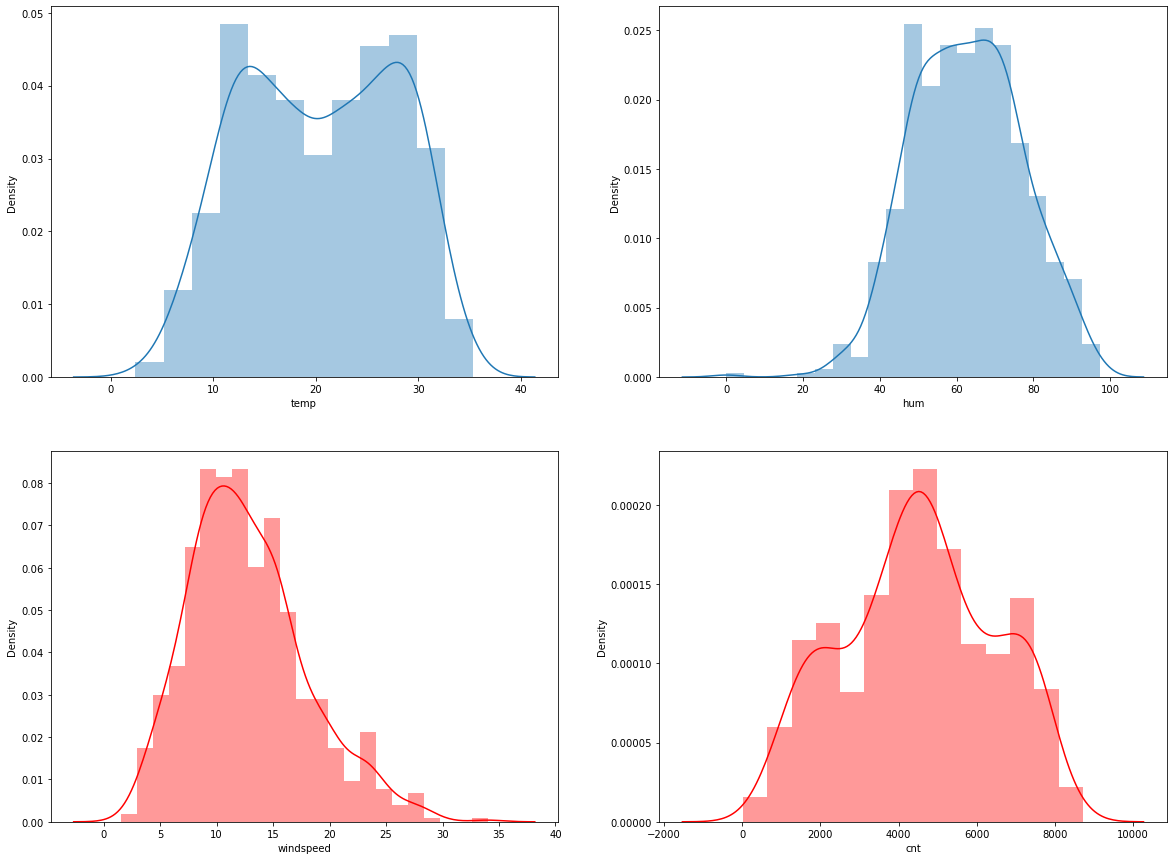

In [16]:
plt.figure(figsize=(20, 15))

#subplot for Temperature
plt.subplot(2,2,1)
sns.distplot(bikes_df['temp'])

plt.subplot(2,2,2)
sns.distplot(bikes_df['hum'])

plt.subplot(2,2,3)
sns.distplot(bikes_df['windspeed'],color='Red')

plt.subplot(2,2,4)
sns.distplot(bikes_df['cnt'],color='Red')


plt.show()

**Inferences:**
- The temperature ranges mostly between 5-35 and the distribution is skewed.
- Distribution for humidity seems like a normal distribution and the mean is near 60 and ranging between 20-100.
- Windspeed also has something similar to normal distribution. It ranges between 0-30 and average windspeed is between 8 and 15.
- Count has a skewed distribution ranging between 0-9000. It seems like on an average around 4000 people use Boombikes daily.

## 3.2: Bivariate Analysis

### 3.2.1: Bivariate Analysis: Numerical Vs Numerical Columns

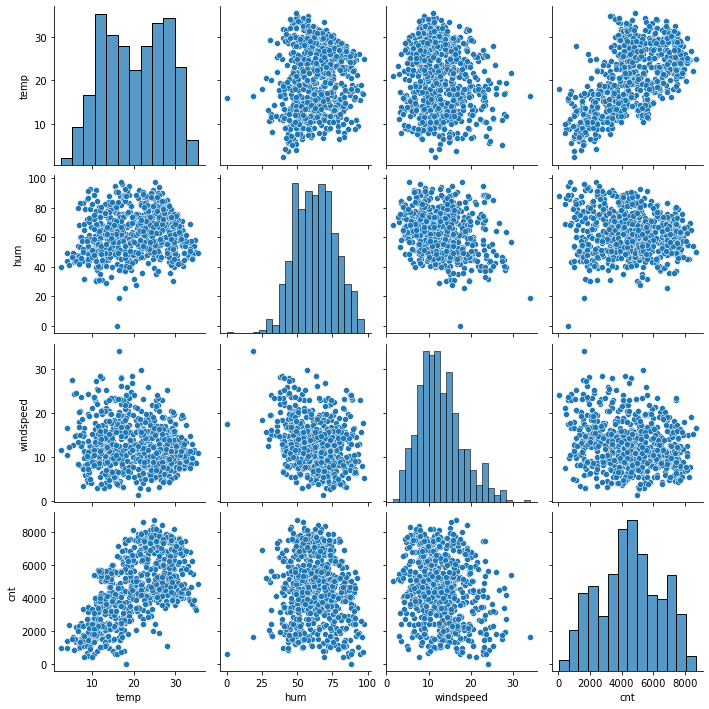

In [17]:
sns.pairplot(bikes_df[['temp','hum','windspeed','cnt']])

**Inferences:**
- We can observe a linear pattern between temp and target variable. This shows that we can build a linear model using this pattern.
- There seems to have no significant pattern between the target variable with humidity and windspeed.

### 3.2.2: Bivariate Analysis: Numerical Vs Categorical Columns

##### Plotting graphs for categorical columns with target variable

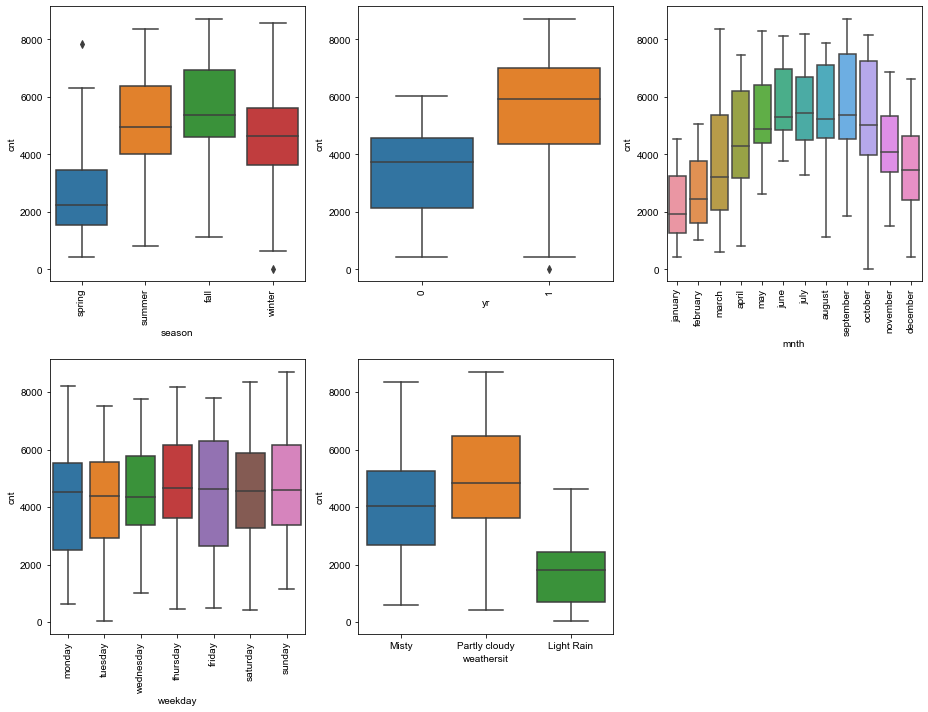

In [18]:
plt.figure(figsize=(13, 10))

#subplot for season Vs Count
plt.subplot(2,3,1)
sns.boxplot(data=bikes_df,x='season', y='cnt')
plt.xticks(rotation=90)
          
#subplot for Year Vs Count
plt.subplot(2,3,2)
sns.boxplot(data=bikes_df,x='yr', y='cnt')
plt.xticks(rotation=90)

#subplot for Month Vs Count
plt.subplot(2,3,3)
sns.boxplot(data=bikes_df,x='mnth', y='cnt')
plt.xticks(rotation=90)

#subplot for Weekday Vs Count
plt.subplot(2,3,4)
sns.boxplot(data=bikes_df,x='weekday', y='cnt')
plt.xticks(rotation=90)

#subplot for Weather Vs Count
plt.subplot(2,3,5)
sns.boxplot(data=bikes_df,x='weathersit', y='cnt')

sns.set_style("dark")
plt.tight_layout()
plt.show()

**Inferences:**
- If we consider the plot between season and target variable, we can observe that spring season has lesser count of bike users than any other season and fall season has the high count of bike users.
- If we consider the plot between year and target variable, 2019 has high count of users than 2018 and the median is also extremely high, this might be due to the increase in popularity.
- For the plot between month and target variable, may, june, july months have higer range of values, i.e., on an average around 5000 people use boombikes in these months.
- For plot between weekday and target variable, the medians are similar for all the days but people are less likely to use bikes on tuesday.
- If we plot weather with target variable, we can observe the range is extremely low when there is Light rain and people are more likely to use bikes in partly cloudy environment rather than Misty.

### 3.2.3: Bivariate Analysis: Categorical Vs Categorical Columns

#### Month Vs Weather

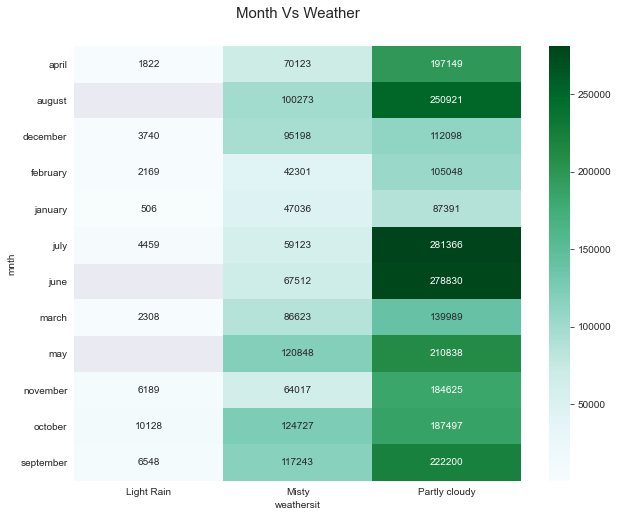

In [19]:
#Creating a pivot_table by aggregating using percentage
piv_tbl = pd.pivot_table(data=bikes_df,index='mnth',columns='weathersit', values = 'cnt', aggfunc =sum)
plt.figure(figsize=(10,8))

#Plotting heatmap using pivot table
ax = sns.heatmap(piv_tbl, cmap = 'BuGn', annot = True,fmt='g')


plt.title('Month Vs Weather',fontsize=15,y=1.05)
plt.show()

**Inferences:**
- People are more likely to use Boombikes during the months of june, july and august.
- People very less likely to use bikes when the climate has Light Rain and more likely to use when the climate is partly cloudy.

### 3.3: Correlation

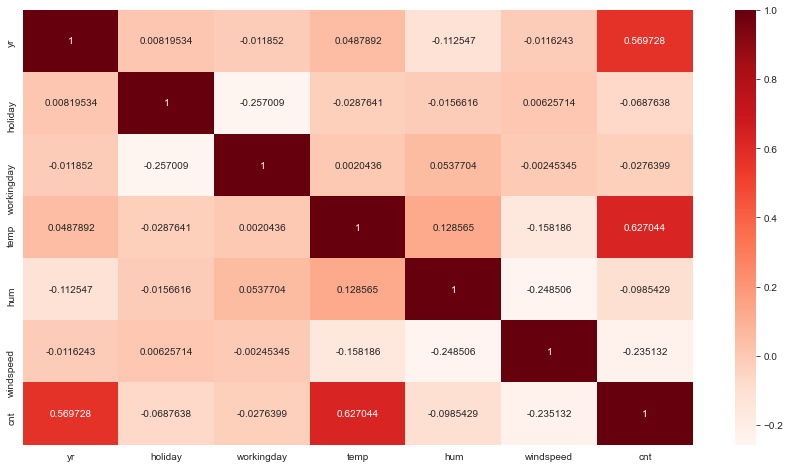

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(bikes_df.corr(), cmap = 'Reds', annot = True,fmt='g')
plt.show()

**Inferences:**
- We  cam observe highest correlation of target variable with year and temperature i.e., count of people using bikes highly depends on these two features.
- We can also observe negative correlation between windspeed and target.

## Step 3: Data Preparation

### 3.1: Dummy Variables

In [21]:
# Defining a function for creating dummies
def create_dummy(bikes_df,col):
    
    #creating dummies dataframe
    dummy_df = pd.get_dummies(bikes_df[col],drop_first=True)
    
    #concatenate dummies dataframe with bikes_df
    bikes_df = pd.concat([bikes_df, dummy_df], axis = 1)
    
    #dropping the original column as dummies have already been created
    bikes_df.drop(col, axis = 1, inplace = True)
    return bikes_df

#### 3.1.1: Creating Dummy Variables for season column

The variable `season` has four levels. Converting these levels into integer. 

In [22]:
bikes_df=create_dummy(bikes_df,'season')
bikes_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,january,0,monday,1,Misty,14.110847,80.5833,10.749882,985,1,0,0
1,0,january,0,tuesday,1,Misty,14.902598,69.6087,16.652113,801,1,0,0
2,0,january,0,wednesday,1,Partly cloudy,8.050924,43.7273,16.636703,1349,1,0,0
3,0,january,0,thursday,1,Partly cloudy,8.200000,59.0435,10.739832,1562,1,0,0
4,0,january,0,friday,1,Partly cloudy,9.305237,43.6957,12.522300,1600,1,0,0


#### 3.1.2: Creating Dummy Variables for mnth column

The variable `mnth` has twelve levels. Converting these levels into integer. 

In [23]:
bikes_df=create_dummy(bikes_df,'mnth')
bikes_df.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,december,february,january,july,june,march,may,november,october,september
0,0,0,monday,1,Misty,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tuesday,1,Misty,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wednesday,1,Partly cloudy,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thursday,1,Partly cloudy,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,friday,1,Partly cloudy,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


#### 3.1.3: Creating Dummy Variables for weekday column

The variable `weekday` has seven levels. Converting these levels into integer. 

In [24]:
bikes_df=create_dummy(bikes_df,'weekday')
bikes_df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,1,Misty,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Misty,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Partly cloudy,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Partly cloudy,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Partly cloudy,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 3.1.4: Creating Dummy Variables for weathersit column

The variable `weathersit` has four levels. Converting these levels into integer. 

In [25]:
bikes_df=create_dummy(bikes_df,'weathersit')
bikes_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Misty,Partly cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
#Checking the shape after creating dummies
print('Count of columns after creating dummies - ',bikes_df.shape[1])

count of columns after creating dummies -  29


## Step 4: Splitting the Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.1: Rescaling the Features using standardization

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Misty,Partly cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Misty,Partly cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.627451
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.2: Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building the model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### 5.1: RFE - Recursive feature elimination

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 22)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 2),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 6),
 ('march', False, 7),
 ('may', True, 1),
 ('november', True, 1),
 ('october', False, 4),
 ('september', True, 1),
 ('monday', True, 1),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 5),
 ('tuesday', True, 1),
 ('wednesday', False, 3),
 ('Misty', True, 1),
 ('Partly cloudy', True, 1)]

In [36]:
# Selecting all the 22 columns considered by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'december', 'february', 'january', 'july', 'may',
       'november', 'september', 'monday', 'saturday', 'sunday', 'tuesday',
       'Misty', 'Partly cloudy'],
      dtype='object')

In [37]:
#Printing the column excluded by RFE
X_train.columns[~rfe.support_]

Index(['august', 'june', 'march', 'october', 'thursday', 'wednesday'], dtype='object')

### 5.2: Building model using statsmodel, for the detailed statistics

In [38]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable  to train dataset
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
# Running the linear model
lm_0 = sm.OLS(y_train,X_train_rfe).fit() 

In [41]:
#Let's see the summary of our linear model
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.46e-185
Time:                        22:42:11   Log-Likelihood:                 522.92
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     487   BIC:                            -902.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1448      0.086      1.676

In [42]:
#Dropping the constant variable
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [43]:
X_train_new.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,december,...,july,may,november,september,monday,saturday,sunday,tuesday,Misty,Partly cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.67
4,hum,36.10
3,temp,30.53
21,Partly cloudy,24.50
18,sunday,14.29
17,saturday,13.45
20,Misty,12.40
6,spring,7.24
5,windspeed,5.41
8,winter,4.97


#### Creating methods for model creation and to calculate VIF

In [45]:
#Creating a method for model creation

def linear_model(X_train_new):

    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_train_new)
    
    # Running the linear model
    lm = sm.OLS(y_train,X_train_lm).fit()
    
    return lm

#Creating a method for vif
def vif_calculator(X_train_new):

    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Sunday column has highest p value and vif greater than 5. Hence, we will be dropping the column

### 5.3: Building models

### Running First Model

In [46]:
X_train_new = X_train_new.drop(["sunday"], axis = 1)

Rebuilding the model without `sunday`

In [47]:
lm_1 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.62e-186
Time:                        22:42:11   Log-Likelihood:                 522.74
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1025      0.049      2.076

In [48]:
vif_1=vif_calculator(X_train_new)
vif_1

,Features,VIF
4,hum,27.96
3,temp,27.07
20,Partly cloudy,16.66
19,Misty,9.48
2,workingday,6.84
6,spring,6.61
5,windspeed,4.80
8,winter,4.57
7,summer,3.99
11,january,2.52


**saturday has highest p value > 0.05. Hence, we will be dropping the column**

Rebuilding the model without `saturday`

### Running Second Model

In [49]:
X_train_new = X_train_new.drop(["saturday"], axis = 1)

In [50]:
lm_2 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.15e-187
Time:                        22:42:11   Log-Likelihood:                 522.63
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     489   BIC:                            -914.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0988      0.049      2.030

In [51]:
vif_2=vif_calculator(X_train_new)
vif_2

,Features,VIF
4,hum,27.56
3,temp,26.80
19,Partly cloudy,16.54
18,Misty,9.46
6,spring,6.55
5,windspeed,4.79
8,winter,4.55
2,workingday,4.47
7,summer,3.97
11,january,2.52


**workingday has highest p value > 0.05. Hence, we will be dropping the column**

Rebuilding the model without `workingday`

### Running Third Model

In [52]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [53]:
lm_3 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.12e-188
Time:                        22:42:12   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0939      0.048      1.939

In [54]:
vif_3=vif_calculator(X_train_new)
vif_3

,Features,VIF
3,hum,27.00
2,temp,26.78
18,Partly cloudy,16.30
17,Misty,9.44
5,spring,6.55
4,windspeed,4.78
7,winter,4.55
6,summer,3.96
10,january,2.52
0,yr,2.11


**summer has p value > 0.05. Hence, we will be dropping the column**

Rebuilding the model without `summer`

### Running Fourth Model

In [55]:
X_train_new = X_train_new.drop(["summer"], axis = 1)

In [56]:
lm_4 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.50e-188
Time:                        22:42:12   Log-Likelihood:                 520.71
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -923.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1242      0.045      2.765

In [57]:
vif_4=vif_calculator(X_train_new)
vif_4

,Features,VIF
3,hum,23.47
2,temp,22.43
17,Partly cloudy,13.47
16,Misty,8.49
5,spring,4.57
4,windspeed,4.34
6,winter,3.24
9,january,2.47
0,yr,2.09
8,february,1.94


**hum has vif > 5. Hence, we will be dropping the column**

Rebuilding the model without `hum`

### Running Fifth Model

In [58]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [59]:
lm_5 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.30e-186
Time:                        22:42:12   Log-Likelihood:                 512.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     492   BIC:                            -912.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0046      0.034      0.133

In [60]:
vif_5=vif_calculator(X_train_new)
vif_5

,Features,VIF
2,temp,14.04
16,Partly cloudy,13.26
15,Misty,7.39
3,windspeed,4.32
4,spring,4.26
5,winter,2.74
8,january,2.36
0,yr,2.08
7,february,1.92
11,november,1.88


**Misty has vif > 5. Hence, we will be dropping the column**

Rebuilding the model without `Misty`

### Running Sixth Model

In [61]:
X_train_new = X_train_new.drop(["Misty"], axis = 1)

In [62]:
lm_6 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.90e-172
Time:                        22:42:12   Log-Likelihood:                 475.96
No. Observations:                 510   AIC:                            -917.9
Df Residuals:                     493   BIC:                            -845.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2028      0.028      7.331

In [63]:
vif_6=vif_calculator(X_train_new)
vif_6

,Features,VIF
2,temp,5.97
3,windspeed,4.05
4,spring,3.88
15,Partly cloudy,2.74
5,winter,2.60
8,january,2.18
0,yr,2.07
7,february,1.88
11,november,1.82
6,december,1.55


**february has p-value > 0.05. Hence, we will be dropping the column**

Rebuilding the model without `february`

### Running Seventh Model

In [64]:
X_train_new = X_train_new.drop(["february"], axis = 1)

In [65]:
lm_7 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     148.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.83e-172
Time:                        22:42:12   Log-Likelihood:                 474.27
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     494   BIC:                            -848.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1926      0.027      7.095

In [66]:
vif_7=vif_calculator(X_train_new)
vif_7

,Features,VIF
2,temp,5.92
3,windspeed,4.05
14,Partly cloudy,2.74
5,winter,2.56
4,spring,2.49
0,yr,2.07
10,november,1.80
7,january,1.63
6,december,1.46
8,july,1.42


**May has p-value > 0.05. Hence, we will be dropping the column**

Rebuilding the model without `may`

### Running Eighth Model

In [67]:
X_train_new = X_train_new.drop(["may"], axis = 1)

In [68]:
lm_8 = linear_model(X_train_new)

#Checking the summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.17e-172
Time:                        22:42:12   Log-Likelihood:                 472.54
No. Observations:                 510   AIC:                            -915.1
Df Residuals:                     495   BIC:                            -851.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2019      0.027      7.552

In [69]:
vif_8=vif_calculator(X_train_new)
vif_8

,Features,VIF
2,temp,5.43
3,windspeed,4.04
13,Partly cloudy,2.74
5,winter,2.49
4,spring,2.44
0,yr,2.06
9,november,1.80
7,january,1.63
6,december,1.46
8,july,1.35


**Observations:**
- In the model lm_8 we can observe that all the p_values are less than 0.05 and VIF between variables is less than 5 except for temp column.
- R Square of model lm_8 is - 0.818. Which means that 81% of target variable can be predicted using the columns present in the model 8 which is a good percentage.
- We will not be dropping the temp column even though the temp column has VIF>5, as there is a linear relationship between temp and target variable. Hence, dropping this variable would effect the model significantly.

## Step 6: Residual Analysis of the train data

Now we will check the error terms are also normally distributed (which is one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

### 6.1: Predicting the target variable using lm_8

In [70]:
X_train_lm = sm.add_constant(X_train_new)
y_train_count = lm_8.predict(X_train_lm)

In [71]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

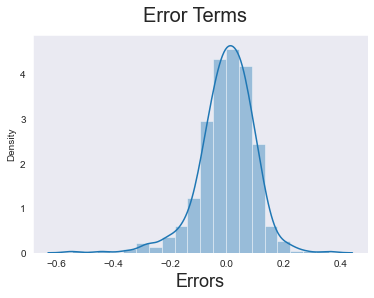

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**Observations:**
- We can observe a normal distribution between error values.
- The mean of the Error terms is 0 and there are no spikes in the graph i.e error terms have constant variance
- The error terms satisfy all the assumptions of Linear Regression i.e., our model is a good example of a linear regression Model.

## Step 7: Making Predictions using lm_8

### 7.1: Applying the scaling on the test sets

In [73]:
# scaling test dataset using Min-Max Scaler
df_test[num_vars] = scaler.transform(df_test[num_vars])

### 7.2: Dividing into X_test and y_test

In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions using lm_8
y_test_pred = lm_8.predict(X_test_new)

## Step8: Model Evaluation

Text(0, 0.5, 'y_pred')

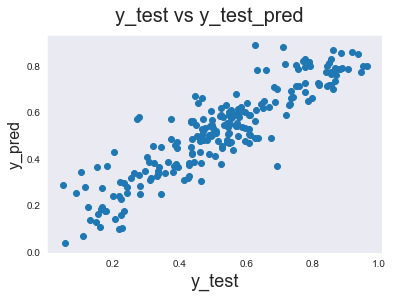

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)

# Plot heading 
fig.suptitle('y_test vs y_test_pred', fontsize=20)  

# X-label
plt.xlabel('y_test', fontsize=18)  

# Y-label
plt.ylabel('y_pred', fontsize=16)                          

**Observations:**
- We can observe a linear pattern between y_test and y_test_pred.
- There is a constant variance with very few outliers.
- Hence, the model built is a good representation of the target variable

In [78]:
# Checking R Score of test dataset
from sklearn.metrics import r2_score
round(r2_score(y_test,y_test_pred),3)

0.81


We can see that the equation of our best fitted line is:


$cnt = 0.4068 \times temp+0.2383 \times yr+0.2019 \times const-0.1704 \times windspeed-0.1041 \times spring+0.0985 \times Partly cloudy-0.0894 \times holiday-0.0686 \times july+0.0536 \times winter+0.0491 \times september-0.0473 \times january-0.0416 \times december-0.041 \times november-0.0278 \times monday-0.0261 \times tuesday $


##  <font color = 'crimson'>Conclusion:</font>
- Top 3 features contributing significantly towards explaining the demand of the shared bikes are – Temperature, year and windspeed
- Temperature has highest positive coefficient i.e., as the temperature increases people are less likely to use a bike for travelling.
- Year has the second highest positive coefficient i.e., as the years increase the popularity also increases and people will be more likely to opt for these bikes.
- Windspeed has a negative coefficient i.e., people are less likely to opt these bikes if the windspeed is high.